In [1]:
source("../R4_Batch_effect_Normalization/mass_cytometry_functions.R")

In [2]:
options(
repr.plot.width=15,
repr.plot.height=7

)

In [3]:
needed_antibody1<- c('141Pr_INS14','142Nd_CD19','143Nd_CD5','144Nd_INS17','145Nd_INS5','146Nd_IgD',
                    '147Sm_INS19','149Sm_INS18','150Nd_INS20','151Eu_INS16','152Sm_CD21',
                    '153Eu_INS7','155Gd_CD27','158Gd_INS24','159Tb_CD22','160Gd_INS3','161Dy_INS26',
                    '162Dy_Ki67','163Dy_INS8','164Dy_INS25','165Ho_INS11','167Er_CD38','168Er_INS13',
                    '169Tm_INS4','172Yb_IgM','173Yb_INS6','174Yb_INS27','175Lu_CXCR4','176Yb_INS1')
needed_antibody1_rename<- c('KLF10','CD19','CD5','MYC','CD83','IgD','NR4A2','PPP1R15A','JUND','FOSB',
                            'CD21','RGS1','CD27','KLF6','CD22','TCL1A','DDIT3','Ki67','YPEL5','HSPA5',
                            'TXNIP','CD38','RGS2','EGR1','IgM','CD69','FOS','CXCR4','Actin')

#####Use the functions

In [4]:
number_of_cell = 2000
cluster_number = 10
concat_result <- generate_concat(c("c"), 
                "../R4_Batch_effect_Normalization/Data/20 CLL/",
                number_of_cell,
                column_needed = needed_antibody1,
                rename_columns_needed = needed_antibody1_rename,
                "yes",
                "playR_concattransformed2"
               )

In [5]:
pqr<- cluster_proportion_from_concat(
    "playR_concattransformed2.fcs",
    FALSE,
    concat_result$cell_lengths,
    cluster_number,
    concat_result$columns_length,
    concat_result$file_names
)

In [6]:
write.csv(pqr$proportion, "playR_clusters_proportions.csv")

In [7]:
# filenames<- rep(concat_result$file_names, each = number_of_cell) 
# orignal_index<- concat_result$original_indexes
# cluster_number<- GetMetaclusters(pqr$fsom)[1:length(orignal_index)]
# clusters_result<- data.frame(filenames, orignal_index, cluster_number)
# write.csv(clusters_result, "cluster_index_filename.csv")

In [1]:
unique(c(1,1,2,2,3))

[1] 1 2 3

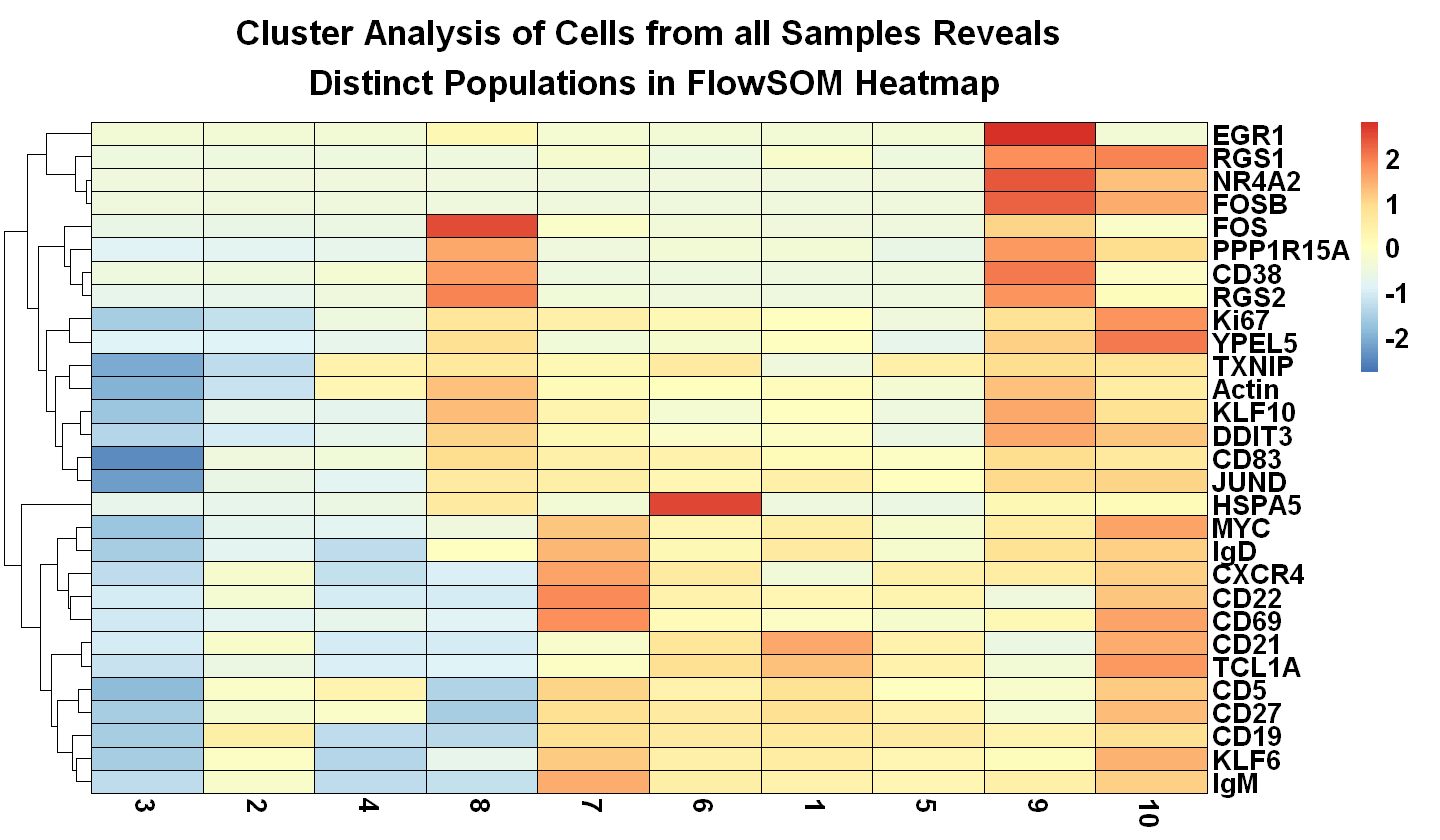

In [20]:
results<- FlowSOM::MetaclusterMFIs(fsom = pqr$fsom)
plot3<- pheatmap::pheatmap(t(results),  
                           border_color = "black", 
                           scale="row",
                           fontsize=16, 
                           fontface= "bold",
                           
                   #annotation_row = rownames(average),
                   #treeheight_row = 0,
                   treeheight_col = 0,
                   #cutree_rows = 2,
                    #show_colnames = F,
                    #show_rownames = F,
                   #kmeans_k= 4,
                    #color = c("blue", "yellow","red"),
                    #breaks = c(-4, -0.5, 1, 4), 
                    main = "Cluster Analysis of Cells from all Samples Reveals\n Distinct Populations in FlowSOM Heatmap"
                  )

<h1>UMAP TO SHOW ALL THE CLUSTERS IN 2D</h1>

In [9]:
BB1<- read.FCS("playR_concattransformed2.fcs")
BB1<- exprs(BB1)
rownames(BB1)<- c(1: dim(BB1)[1])

In [10]:
number_of_umap_cell <- 10000
BB1<- BB1[sample(nrow(BB1), number_of_umap_cell), ]

In [11]:
yyy<- pqr$fsom[[2]]
attributes(yyy)<- NULL
for (i in c(1:cluster_number))
    {assign(paste("yyy", i, sep=""), which(i == yyy))}

In [12]:
tobeindexed<- pqr$fsom[[1]]$map$mapping
rownames(tobeindexed)<- c(1:dim(tobeindexed)[1])
acc<- c()
for (i in rownames(BB1))
    {new<- tobeindexed[i, 1]
    new<- new[[1]]
    acc<- append(acc, new)}

In [13]:
table(pqr$fsom[[2]])
as.vector(table(pqr$fsom[[2]]))
bak<- rep(c(1:cluster_number), times=as.vector(table(pqr$fsom[[2]])))

bak1<- c(yyy1, yyy2, yyy3, yyy4, yyy5, yyy6, yyy7, yyy8, yyy9, yyy10) 
#yyy11, yyy12, yyy13, yyy14, yyy15, yyy16, yyy17, yyy18, yyy19, yyy20)
#bak1<- bak1[1:cluster_number]
df2<- data.frame(bak1)
df2$bak<- bak 
new5<- c()
for (i in acc)
    {pp<-df2[which(df2$bak1==i), 2]
    new5<- append(new5, pp)}
kj<- new5
Labels<-kj
kj<-as.factor(kj)
colors = randomcoloR::distinctColorPalette(length(unique(kj)))


 1  2  3  4  5  6  7  8  9 10 
17 21  1  6 41  3  3  1  1  6 

[1] 17 21  1  6 41  3  3  1  1  6

In [14]:
set.seed(45)
gg<- umap::umap(BB1, n_neighbours= 200, min_dist= 0.25)

In [15]:
options(
repr.plot.width=12,
repr.plot.height=7

)

In [16]:
df1<- gg$layout
colnames(df1)<- c("umap1", "umap2")
clusters<- kj
df1<- cbind(df1, clusters)
first<- aggregate(umap1 ~ clusters, data = df1, mean)
second<- aggregate(umap2 ~ clusters, data = df1, mean)
coordinate<- cbind(first, second$umap2)
colnames(coordinate)<- c("clusters", "umap1", "umap2")

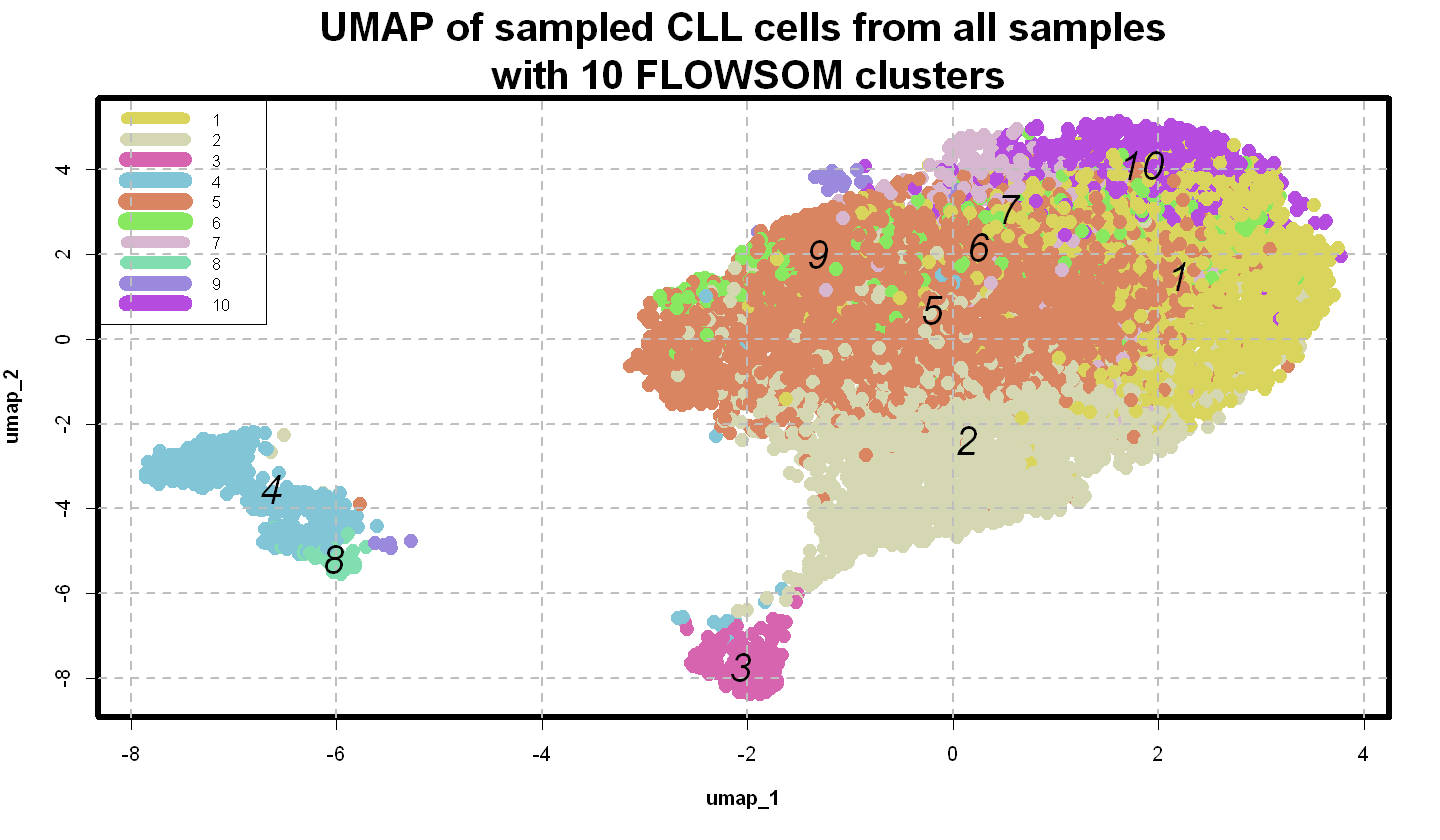

In [19]:
plot(gg$layout, main= paste0("UMAP of sampled CLL cells from all samples\n with ", cluster_number,  " FLOWSOM clusters"),
     xlab=substitute(paste(bold('umap_1'))), 
     ylab=substitute(paste(bold('umap_2'))),
     col=colors[kj], 
     pch=19,
    cex= 1.5,
    cex.main=2.0
   ) 

legend("topleft", legend= c(1:cluster_number), col=colors, lwd=10:15, cex=0.8)
box(lwd= 5)
grid(nx = NULL, ny = NULL,
     lty = 2,      # Grid line type
     col = "gray", # Grid line color
     lwd = 2) 
for (i in c(1:dim(coordinate)[1])){
   text(x=coordinate[i, 2], y=coordinate[i, 3], coordinate[i, 1], cex=2, font=3)}

In [5]:
# Define the character vector
strings <- c("apple", "banana", "cherry", "date", "elderberry")

# Define the integer vector (indices)
indices <- c(3, 1, 4, 2, 5, 5,2)

# Fetch corresponding strings using indices
assigned_values <- strings[indices]

# Print result
print(assigned_values)


[1] "cherry"     "apple"      "date"       "banana"     "elderberry"
[6] "elderberry" "banana"    
